# Using SVM Classifier 

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

### Reading and cleaning data

In [112]:
data = pd.read_csv(r"C:\Users\Aarushi Wagh\Downloads\code1\codes\isolation_forest_test_data.csv")
data.head()

data['label'] = data['label'].replace(['Inlier', 'Outlier'],(0,1))
data.head()

X = data[["app_cpu_apps.plugin_x","app_cpu_tc-qos-helper_x","app_cpu_ssh_x","running","used","cached","buffers"]].values
y = data['label'].values


### Visualizing the distribution of data

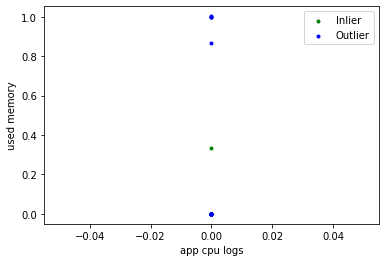

In [3]:
df0 = data[data.label==0]
df1 = data[data.label==1]
plt.scatter(df0["app_cpu_logs_x"][:10],df0["app_cpu_tc-qos-helper_x"][:10],color="green",marker=".",label="Inlier")
plt.scatter(df1["app_cpu_logs_x"][:10],df1["app_cpu_tc-qos-helper_x"][:10],color="blue",marker=".",label="Outlier")
plt.xlabel("app cpu logs")
plt.ylabel("used memory")
plt.legend()

### Splitting, oversampling and undersampling data

In [113]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X, y, test_size = 0.20, stratify=y)
oversample = RandomOverSampler(sampling_strategy=0.5)
undersample = RandomUnderSampler(sampling_strategy=0.8)
X_over, y_over = oversample.fit_resample(X_train_svc, y_train_svc)
#X_under, y_under = undersample.fit_resample(X_train_svc, y_train_svc)
X_both, y_both = undersample.fit_resample(X_over, y_over)
print(Counter(y_train_svc))
#print(Counter(y_under))
print(Counter(y_over))
print(Counter(y_both))

Counter({0: 3988, 1: 48})
Counter({0: 3988, 1: 1994})
Counter({0: 2492, 1: 1994})


### Performing GridSearch to select best parameters for the model

In [107]:
clf = RandomizedSearchCV(SVC(),{'C':[1,10], 'kernel':['rbf','linear']}, cv=3)

In [108]:
clf.fit(X_both,y_both.ravel())
df = pd.DataFrame(clf.cv_results_)

d:\python\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [109]:
print(df[['param_kernel','param_C','mean_test_score']])
print(clf.best_params_)

  param_kernel param_C  mean_test_score
0          rbf       1         0.847079
1       linear       1         0.859113
2          rbf      10         0.897236
3       linear      10         0.858444
{'kernel': 'rbf', 'C': 10}


### Training the model

In [114]:
data_model_svc = SVC(kernel="rbf",C=10)
data_model_svc.fit(X_both, y_both.ravel())
y_predicted_svc = data_model_svc.predict(X_test_svc)
print(data_model_svc.score(X_test_svc,y_test_svc))

0.996039603960396


### Performance metrics

In [115]:
report = classification_report(y_test_svc, y_predicted_svc)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       998
           1       0.90      0.75      0.82        12

    accuracy                           1.00      1010
   macro avg       0.95      0.87      0.91      1010
weighted avg       1.00      1.00      1.00      1010



In [116]:
print(confusion_matrix(y_test_svc, y_predicted_svc))
print(precision_score(y_test_svc, y_predicted_svc))
print(recall_score(y_test_svc, y_predicted_svc))
print(f1_score(y_test_svc, y_predicted_svc))

[[997   1]
 [  3   9]]
0.9
0.75
0.8181818181818182


### Visualizing the results of the model by plotting predicted values and actual values

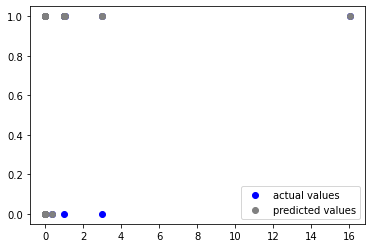

In [82]:
plt.scatter(X_test_svc[:,2], y_test_svc, color="blue", label="actual values")
plt.scatter(X_test_svc[:,2], y_predicted_svc, color="grey", label="predicted values")
plt.legend()